<a href="https://colab.research.google.com/github/MohammadMaftoun/HeartProblem/blob/main/HeartProject(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#For better visualization some of libraries such as  seaborn,matplotlib,sweetviz,pandas_profiling can help us.
#!pip install matplotlib
#!pip install seaborn
#!pip install sweetviz
#!pip install pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw
import pandas_profiling

In [ ]:
HeartDataSet=pd.read_csv("heart.csv")
HeartDataSet.head()

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
HeartDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
HeartDataSet.describe()

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's see the report of dataset.
By pandas_profiling or sweetviz.

In [ ]:
Dataset_report = sw.analyze(HeartDataSet)
Dataset_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


As we noticed fortunately we didn't have any missing values.

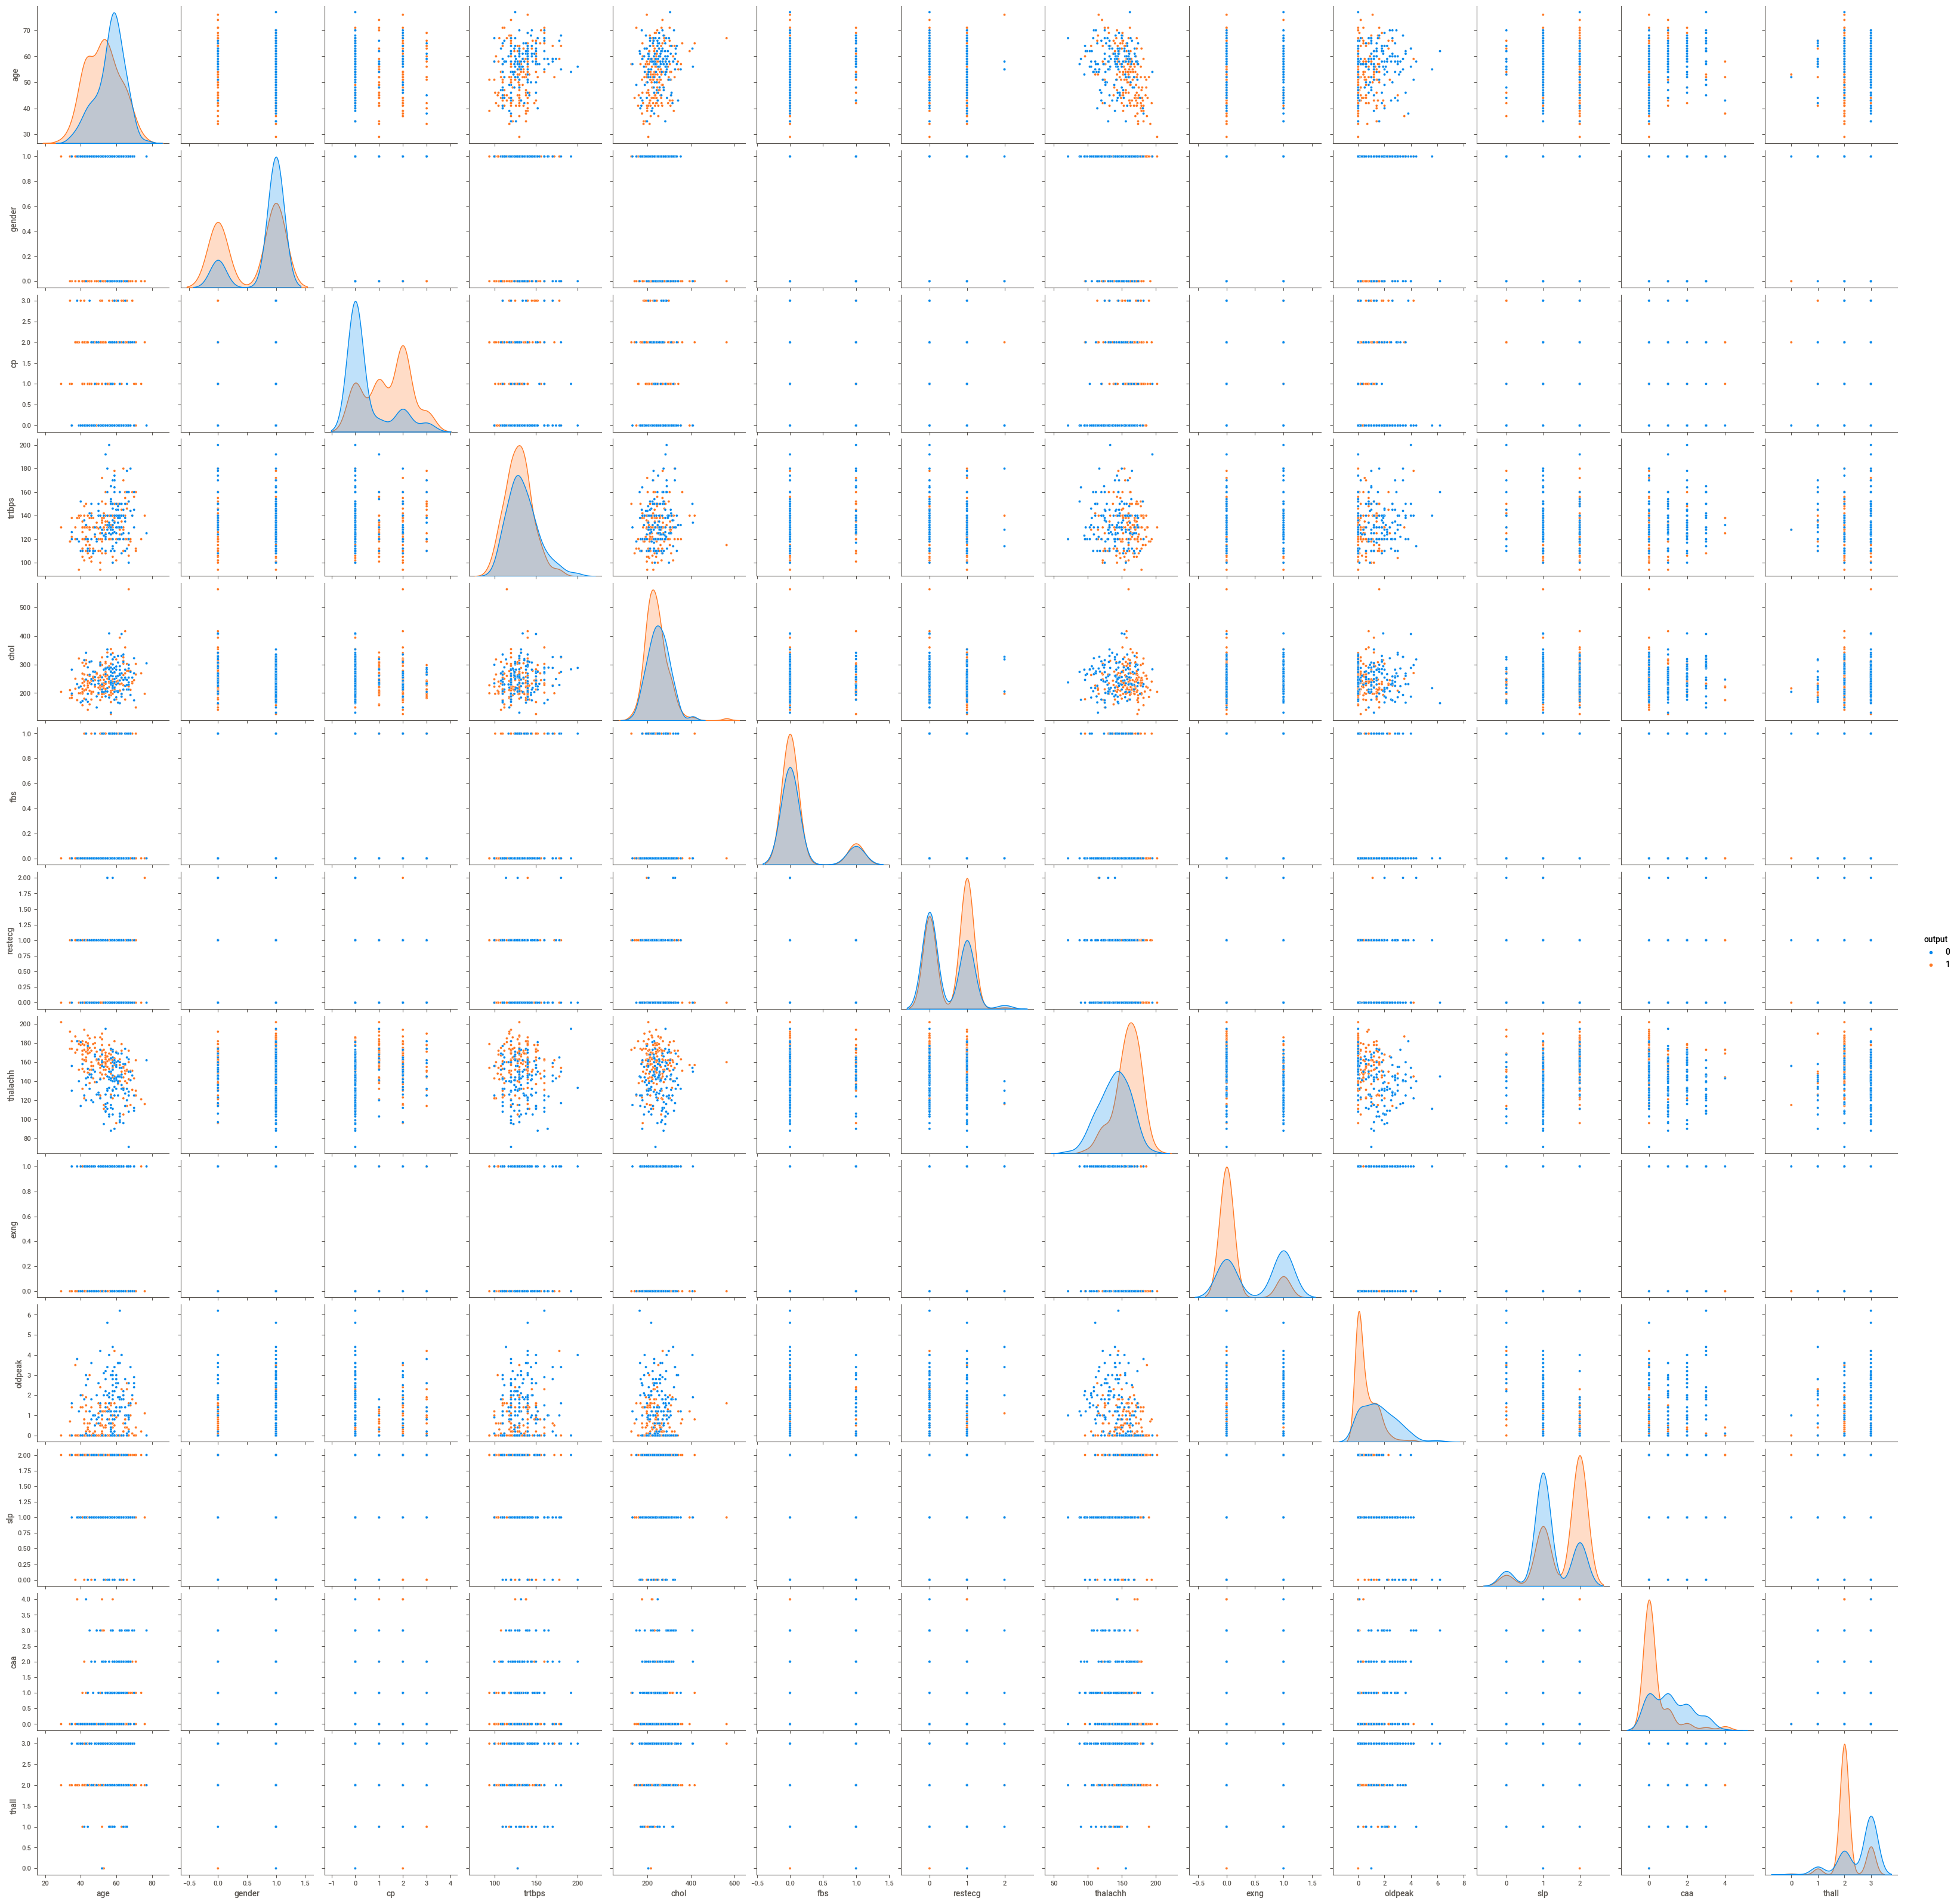

In [ ]:
sns.pairplot(data=HeartDataSet,hue='output',diag_kind='kde')
plt.show()

Now It's time to prepare our dataset before ml modeling.
we have 3 steps:
1)One Hot Encoding
2)Droping some columns
3)Seperating Dependent Features

In [ ]:
cp = pd.get_dummies(HeartDataSet['cp'], prefix='cp')
thall = pd.get_dummies(HeartDataSet['thall'], prefix='thall')
slp = pd.get_dummies(HeartDataSet['slp'], prefix='slp')
frames = [HeartDataSet, cp, thall, slp]
HeartDataSet = pd.concat(frames, axis = 1)

In [ ]:
HeartDataSet = HeartDataSet.drop(columns = ['cp', 'thall', 'slp'])

In [ ]:
x = HeartDataSet.drop(['output'], axis=1)
y = HeartDataSet['output']

Now in this part we must import all libraries we need.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

Normalization of data:

In [ ]:
x = MinMaxScaler().fit_transform(x)

Train and Test Set:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Checking Algorithms:

In [ ]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 6 26]]

The accuracy of Logistic Regression is :  86.88524590163934 %

Precision score for Logistic Regression is : 92.85714285714286 %

Recall score for Logistic Regression is : 81.25 %


In [ ]:
#KNN
model = KNeighborsClassifier(n_neighbors = 5)  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 9 23]]

The accuracy of KNN is :  81.9672131147541 %

Precision score for KNN is : 92.0 %

Recall score for KNN is : 71.875 %


In [ ]:
#SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for SVM is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 5 27]]

The accuracy of SVM is :  86.88524590163934 %

Precision score for SVM is : 90.0 %

Recall score for SVM is : 84.375 %


In [ ]:
#DecisionTree
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=0)
model.fit(X_train, y_train.ravel())
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of DecisionTree is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for DecisionTree is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for DecisionTree is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 7 25]]

The accuracy of DecisionTree is :  85.24590163934425 %

Precision score for DecisionTree is : 92.5925925925926 %

Recall score for DecisionTree is : 78.125 %


In [ ]:
#RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=0,min_samples_split=0.12)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of RandomForest is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for RandomForest is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for RandomForest is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[25  4]
 [ 4 28]]

The accuracy of RandomForest is :  86.88524590163934 %

Precision score for RandomForest is : 87.5 %

Recall score for RandomForest is : 87.5 %


In [ ]:
print("Conclusion:")

Conclusion:


As we saw,the accuracy result of three algorithms(LogisticRegression,SVC,RandomForest) were the same.
And according to accuracy result of other Algorithms,we figure out that knn's performance was a little bit lower.